# Objectives
In this code, the exported data for aruco-board and cautery pen's tip location is analyzed.
The data is stored in the "output" folder. Following are the general objectives:
* Basic EDA of both the DFs.
* Assess if dataset claning is necessary
* Produce some sample images and data of tip location detection anomally.
* Mean and STD of distance variation between tip and board location for each frame where both were detected
* Mean and STD of board location.
*  Mean and STD of tip location.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

# Data: Input_3
Folloing are samples of the aruco and tip location data we have. The (x,y,z) coordinate corresponds to the camera coordinate system. Following is the cooridnate system used in opencv. In the data, the Frame column represents the frame number at which the readings were made. All units in the data are in cm.

<img src="https://docs.opencv.org/2.4/_images/pinhole_camera_model.png">

In the data capture system, the camera was fixed on a rig. The aruco baord was also fixed and was not moved during the video capture. Only the hand containing the pen was moved while keeping the tip of the pen exactly on the tracked point of the aruco board. In every frame of the videos, both hand and the board were sumltaneously present.

In [2]:
excel_file_name = "input_3.xlsx"
excel_folder_name = "output"
excel_file_path = "./" + excel_folder_name + "/" + excel_file_name
tip_locs = pd.read_excel(excel_file_path, sheet_name = "tip_locs")
board_locs = pd.read_excel(excel_file_path, sheet_name = "board_locs")

In [3]:
print("Some samples of board_locs:")
board_locs.head()

Some samples of board_locs:


,Frame,x,y,z
0,0,12.769780,-18.635269,180.391304
1,1,12.764199,-18.574368,179.285543
2,2,12.739823,-18.613104,179.615867
3,3,12.770314,-18.633677,179.679383
4,4,12.739791,-18.608256,179.579969


In [4]:
print("Some samples of tip_locs: ")
tip_locs.head()

Some samples of tip_locs: 


,Frame,x,y,z
0,0,12.693507,-14.813028,135.519491
1,1,12.973394,-16.187421,139.869646
2,2,12.559670,-15.636413,137.283471
3,3,12.201475,-15.081753,134.405995
4,4,11.215171,-12.908695,126.342419


## Basic EDA
First lets get a general idea of data.
### Board Location EDA
Following is the basic EDA of aruco board data.  
Mean is \[12.456506	-18.456215	179.064278\].  
Std is \[0.243353	0.414915	6.195173\].  
<b>It seems like the board's location is not that stable. The maximum std is 6.2 cm along the z axis.</b>  
<b>Due to this unstability, I won't be using this data for making any conclusions.</b>

### Reason for Unstability and Solution:
* The camera was too far. In input 1 and 2 the mean distance was about 120 cm. In this input video 3 the distance is 215 cm.
* The marker sizes are not large enough. The aruco marker sizes can be made bigger so that the board can be tracked from further away. 


In [5]:
print("Basic board location data stats: ")
board_locs.describe()

Basic board location data stats: 


,Frame,x,y,z
count,215.000000,215.000000,215.000000,215.000000
mean,107.841860,12.456506,-18.456215,179.064278
std,63.204705,0.243353,0.414915,6.195173
min,0.000000,10.683979,-21.794323,127.231245
25%,53.500000,12.411336,-18.439637,179.601640
50%,107.000000,12.452873,-18.405709,179.799141
75%,162.500000,12.515707,-18.355194,180.060777
max,217.000000,12.880782,-18.024897,181.062635


### Tip Location EDA
Following is the basic EDA of tip location data.  
From the data, location mean is = \[9.609186	-12.780254	124.425493\]  
std is \[5.294586	6.073354	31.340169\].  
From std information it seems that in every axis the estimation varies a lot, with minimum of 5.2 cm in x axis and 31.34 cm in z axis.

In comparison to input_1 video's data, this variation is much higher. In input_1 video, max std of z axis (5 cm).

In [6]:
print("Basic tip_locs stats: ")
tip_locs.describe()

Basic tip_locs stats: 


,Frame,x,y,z
count,172.000000,172.000000,172.000000,172.000000
mean,105.424419,9.609186,-12.780254,124.425493
std,67.570453,5.294586,6.073354,31.340169
min,0.000000,-1.840613,-64.445849,0.202999
25%,42.750000,8.323953,-14.340235,120.239578
50%,102.500000,9.837778,-13.167778,125.250937
75%,167.250000,11.654279,-11.378989,129.086562
max,217.000000,53.480602,18.354326,407.717364


### Possible Anomalies in Tip Location Data
As DOPE isn't perfect, there might be several outliers affecting the above EDA. In this part, let's look at some of this possible sources annomalies.

#### Duplicates in tip_locs
Frame number will be duplicates if in any frame two cubes were identified by dope. For input_3 it seems like there are no duplicates in "Frame" column.

In [7]:
dups = tip_locs["Frame"].duplicated()
print("Number of frames with more than one cube identified: {}".format(dups.sum()))


Number of frames with more than one cube identified: 0


#### Anomalous Detecion
Sometimes DOPE estimates other objects wrongly as the hand carrying the pen. I did keep the background as clean as possible to test in ideal conditions. However, there might be anomalies. Following are the plots of the coordinates in cm.

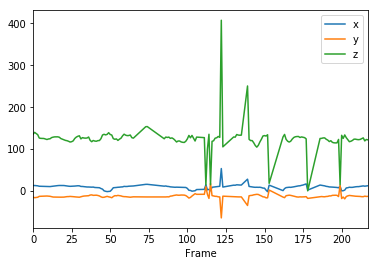

In [18]:
tip_locs.plot("Frame")

From the plot it can be safely assumed that out of 172 frames, at-least in 7 frames the detection was anomalous. I will not be deleting these entries from the data. That is because, these anomalies actually represent the real behaviour of DOPE in experiment.

## Tip Tracking Validation
Let's now validate the tip localization. To do that, I will consider only those frames where both tip and board was identified.

In [9]:
common_board_locs = board_locs[board_locs.Frame.isin(tip_locs.Frame)] 
common_board_locs.describe()

,Frame,x,y,z
count,169.000000,169.000000,169.000000,169.000000
mean,104.532544,12.462118,-18.470869,178.851128
std,67.760348,0.269308,0.463061,6.972042
min,0.000000,10.683979,-21.794323,127.231245
25%,42.000000,12.417903,-18.444679,179.601990
50%,101.000000,12.462420,-18.404249,179.764216
75%,167.000000,12.525464,-18.353758,180.049286
max,217.000000,12.880782,-18.024897,181.062635


In [10]:
common_tip_locs = tip_locs[tip_locs.Frame.isin(board_locs.Frame)]
common_tip_locs.describe()

,Frame,x,y,z
count,169.000000,169.000000,169.000000,169.000000
mean,104.532544,9.579886,-12.761004,124.346456
std,67.760348,5.318879,6.125325,31.611011
min,0.000000,-1.840613,-64.445849,0.202999
25%,42.000000,8.335823,-14.337993,120.154856
50%,101.000000,9.811695,-13.119537,125.113677
75%,167.000000,11.627485,-11.323952,129.069906
max,217.000000,53.480602,18.354326,407.717364


The mean and STD of the difference between estimated board and tip locations are:

In [19]:
print("Mean:")
print(np.mean(common_board_locs[["x","y","z"]] - common_tip_locs[["x","y","z"]]))
print("\nSTD:")
print(np.std(common_board_locs[["x","y","z"]] - common_tip_locs[["x","y","z"]]))

Mean:
x     2.885359
y    -5.733414
z    54.856164
dtype: float64

STD:
x     5.438093
y     6.156647
z    33.587753
dtype: float64
